In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from copy import deepcopy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
#from orion.contrib.envs import load_env
#load_env()
import boto3
#from orion.sources import S3Source
aws_bucket = 'kilimanjaro-prod-datalake'
s3 = boto3.client('s3')

In [3]:
time = pd.read_csv('transaction_time.csv')
time.head()

,Unnamed: 0,orderdate,customerkey,unitssold,grosssales
0,0,2015-07-01,1355,3688,128550.58
1,1,2015-07-02,1742,5177,162852.24
2,2,2015-07-03,1271,3618,115651.29
3,3,2015-07-04,1302,3304,113969.56
4,4,2015-07-05,1845,5192,171758.21


In [4]:
time['orderdate'] = pd.to_datetime(time['orderdate'], errors='coerce')
time['year'] = time['orderdate'].dt.year
time['month'] = time['orderdate'].dt.month
time['dayofweek'] = time['orderdate'].dt.dayofweek

In [5]:
ax = sns.violinplot(x="time", y="tip", data=tips,
                    order=["Dinner", "Lunch"])

NameError: name 'tips' is not defined

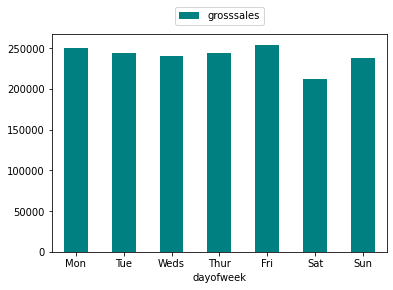

In [6]:
DayofWeek = time[["grosssales", "dayofweek"]]
DayofWeek = DayofWeek.groupby('dayofweek').mean()
DayofWeek=DayofWeek.reset_index()
DayofWeek["dayofweek"]=DayofWeek["dayofweek"].replace({0: 'Mon', 1: 'Tue', 2: 'Weds', 3: 'Thur', 4:'Fri', 5:'Sat',6:'Sun'})
DayofWeek["dayofweek"] = pd.Categorical(DayofWeek.dayofweek, ordered=True)
dayplot = DayofWeek.plot.bar(x='dayofweek', y='grosssales', rot=0, color='teal')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

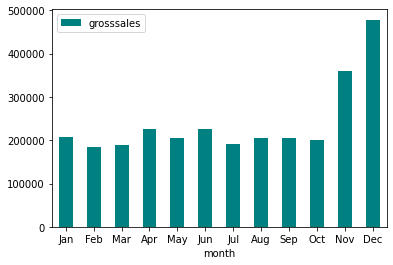

In [7]:
Month = time[["grosssales", "month"]]
Month = Month.groupby('month').mean()
Month= Month.reset_index()
Month['month']=Month['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
Monthplot = Month.plot.bar(x='month', y='grosssales', rot=0, color='teal')

Text(0, 0.5, 'Mean Sales')

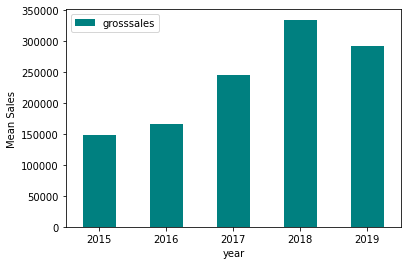

In [8]:
Year = time[["grosssales", "year"]]
Year = Year.groupby('year').mean()
Year= Year.reset_index()
Yearplot = Year.plot.bar(x='year', y='grosssales', rot=0, color='teal')
plt.ylabel('Mean Sales')

In [9]:
#### bring in time

In [10]:
cust = pd.read_csv('Cust_freq_full.csv')
cust.head()

,Unnamed: 0,customerkey,orders,unitssold,grosssales,gsales_perunit,loyaltyaccount,gender
0,3,3ebe433c81198a609bc5149c75475076bab5bdac,40,234,3687.13,18.02,Yes,male
1,5,f91a83c41bc2e316c74fe6714cb75a1aba4eed85,35,145,5612.27,39.04,Yes,male
2,7,649cca818138ed8152825855e0538ed7360bd55a,31,98,4037.72,43.12,Yes,female
3,8,ee823deafb4564bea9acc70453b975dd58cfa282,31,87,4716.21,59.20,Yes,male
4,10,35d17f77612459a698d0179b7525c6eedacc6fd6,25,52,2463.30,53.33,Yes,female


In [11]:
cust['gender'].value_counts()

female     124315
male       116285
unknown       206
Name: gender, dtype: int64

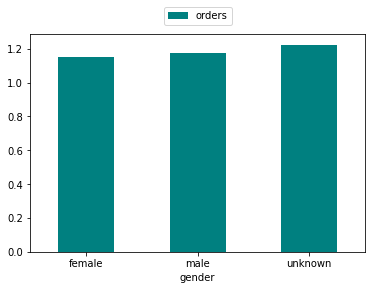

In [20]:
gend = cust[["orders", "gender"]]
gend = gend.groupby('gender').mean()
gend= gend.reset_index()
gend = gend.plot.bar(x='gender', y='orders', rot=0, color='teal')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

<AxesSubplot:xlabel='gender', ylabel='orders'>

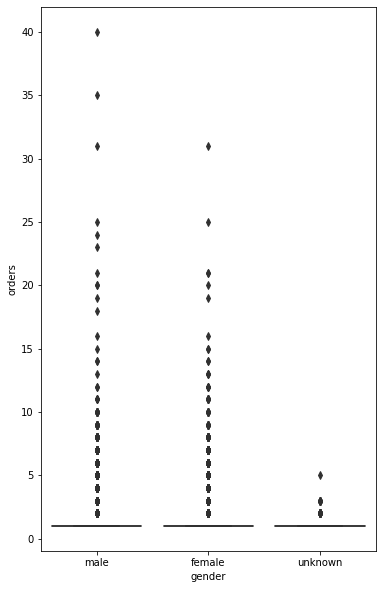

In [21]:
plt.figure(figsize=(6,10))
gender = cust[["orders", "gender"]]
sns.boxplot(x="gender", y="orders", data=gender, palette="mako")

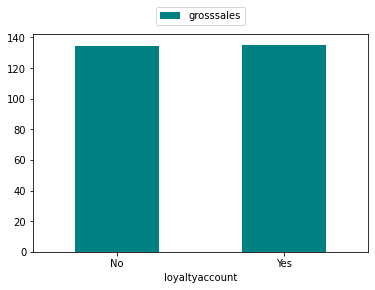

In [22]:
loyal = cust[["grosssales", "loyaltyaccount"]]
loyal = loyal.groupby('loyaltyaccount').mean()
loyal= loyal.reset_index()
loyal = loyal.plot.bar(x='loyaltyaccount', y='grosssales', rot=0, color='teal')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

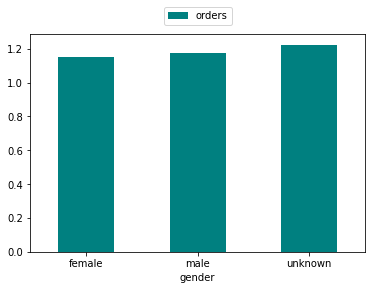

In [15]:
gendf = cust[["orders", "gender"]]
gendf = gendf.groupby('gender').mean()
gendf= gendf.reset_index()
gendf = gendf.plot.bar(x='gender', y='orders', rot=0, color='teal')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

In [ ]:
gross_sales = orders.grosssales.values
ax = sns.histplot(gross_sales, stat="density", binwidth=100, kde=True)
plt.title('Histogram showing distribution of gross sales per order')
plt.show()

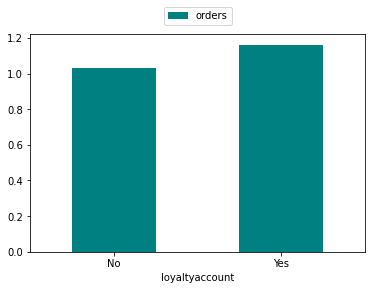

In [16]:
loyalf = cust[["orders", "loyaltyaccount"]]
loyalf = loyalf.groupby('loyaltyaccount').mean()
loyalf= loyalf.reset_index()
loyalf = loyalf.plot.bar(x='loyaltyaccount', y='orders', rot=0, color='teal')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

<AxesSubplot:xlabel='loyaltyaccount', ylabel='orders'>

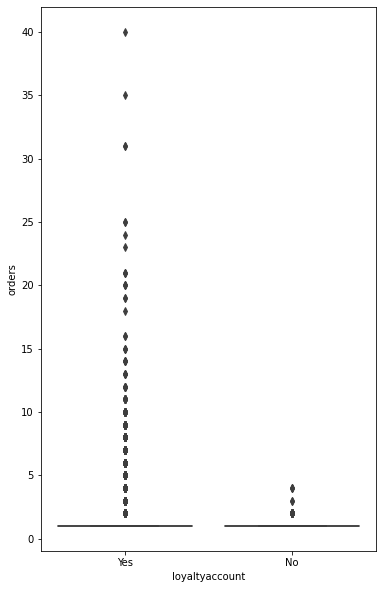

In [18]:
plt.figure(figsize=(6,10))
loyalf = cust[["orders", "loyaltyaccount"]]
sns.boxplot(x="loyaltyaccount", y="orders", data=loyalf, palette="mako")

In [20]:
orders = pd.read_csv('orders.csv')

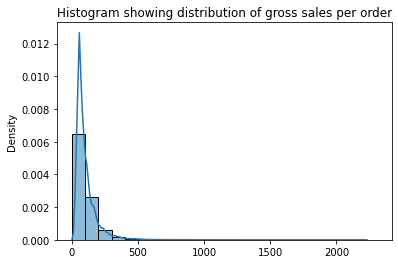

In [21]:
gross_sales = orders.grosssales.values
ax = sns.histplot(gross_sales, stat="density", binwidth=100, kde=True)
plt.title('Histogram showing distribution of gross sales per order')
plt.show()

In [22]:
freq = pd.read_csv('customer_orderfreq.csv')

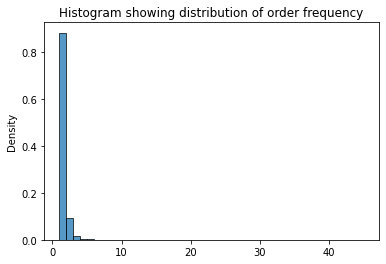

In [23]:
frequency = freq.orders.values
ax = sns.histplot(frequency, stat="density", binwidth=1)
plt.title('Histogram showing distribution of order frequency')
plt.show()

In [24]:
single_purchase = len(freq[(freq['orders'] == 1)])
multi_purchase = len(freq[(freq['orders'] != 1)])
print(single_purchase)
print(multi_purchase)
print(multi_purchase/ single_purchase)

334734
44849
0.13398399923521362


In [26]:
test_view = pd.read_csv('returns.csv')

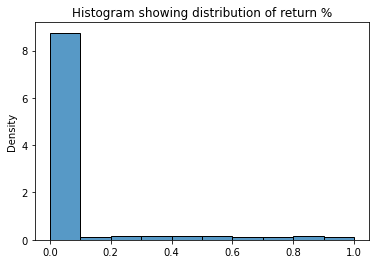

In [27]:
ret = test_view['%_returned'].values
ax = sns.histplot(ret, stat="density", binwidth=0.1)
plt.title('Histogram showing distribution of return %')
plt.show()

In [ ]:
freq_cust.to_csv('Cust_freq_full.csv')